# Section 1 Libraries and data

In [20]:
#!pip install pmdarima

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
#load the data
#YYYY-MM-DD
df = pd.read_csv('nyc_data.csv', index_col = 0, parse_dates = True)
future_df = pd.read_csv('future.csv', index_col = 0, parse_dates = True)
future_df.head()

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968


In [3]:
#Rename variable
df = df.rename(columns = {'Demand': 'y'})
df.head(0)

,y,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,


In [4]:
#Extract regressors
train_X = df.iloc[:,1:]
future_X = future_df.iloc[:,1:]
future_X.head(0)

,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,


# Section 2 SARIMAX model

In [5]:
#get the best parameters
parameters  = pd.read_csv("best_params_sarimax.csv", 
                          index_col = 0)
parameters

,51
D,1.000000
P,1.000000
Q,2.000000
d,1.000000
p,2.000000
q,0.000000
rmse,58.891397


## Parameters

In [6]:
#store the individuals parameters
p = parameters.loc["p"][0]
d = parameters.loc["d"][0]
q = parameters.loc["q"][0]
P = parameters.loc["P"][0]
D = parameters.loc["D"][0]
Q = parameters.loc["Q"][0]

print((p,d,q),(P,D,Q))

(2.0, 1.0, 0.0) (1.0, 1.0, 2.0)


## Model

In [7]:
#Model
#hourly: 24, daily: 7, weekly:52, monthly:12, quarterly:4
model = pm.ARIMA(order = (p,d,q),
                 seasonal_order = (P,D,Q, 7),
                 X = train_X,
                 suppress_warning = True,
                 force_stationarity = False)
model.fit(df.y)

/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/aurorafu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(order=(2.0, 1.0, 0.0), seasonal_order=(1.0, 1.0, 2.0, 7))

# Section 3 Forecasting

In [11]:
pd.Series(model.predict(n_periods = len(future_df), X = future_X))

2021-01-01    723.397197
2021-01-02    809.390392
2021-01-03    740.226097
2021-01-04    871.244540
2021-01-05    740.563972
2021-01-06    897.764442
2021-01-07    791.550125
2021-01-08    704.545255
2021-01-09    820.220602
2021-01-10    739.759282
2021-01-11    869.735453
2021-01-12    742.528127
2021-01-13    898.980154
2021-01-14    791.101979
2021-01-15    705.304818
2021-01-16    820.286919
2021-01-17    739.563393
2021-01-18    868.859199
2021-01-19    743.240250
2021-01-20    897.525976
2021-01-21    791.622895
2021-01-22    705.378887
2021-01-23    820.420679
2021-01-24    740.139846
2021-01-25    870.196432
2021-01-26    742.879175
2021-01-27    899.371703
2021-01-28    791.508483
2021-01-29    705.688296
2021-01-30    820.683607
2021-01-31    739.960469
Freq: D, dtype: float64

In [12]:
future_df

,Demand,Easter,Thanksgiving,Christmas,Temperature,Marketing
Date,,,,,,
2021-01-01,NaN,0,0,0,5.00,154.221
2021-01-02,NaN,0,0,0,11.11,264.805
2021-01-03,NaN,0,0,0,3.89,115.499
2021-01-04,NaN,0,0,0,6.67,124.650
2021-01-05,NaN,0,0,0,5.56,77.968
2021-01-06,NaN,0,0,0,5.56,234.200
2021-01-07,NaN,0,0,0,6.11,142.041
2021-01-08,NaN,0,0,0,3.89,252.094
2021-01-09,NaN,0,0,0,2.78,100.483


## Predictions

In [11]:
predictions_sarimax = pd.Series(model.predict(n_periods = len(future_df),
                                              X = future_X)).rename("sarimax") #before it was D
predictions_sarimax.index = future_df.index # change the index, or it's 0,1,...,31
predictions_sarimax

Date
2021-01-01    723.397197
2021-01-02    809.390392
2021-01-03    740.226097
2021-01-04    871.244540
2021-01-05    740.563972
2021-01-06    897.764442
2021-01-07    791.550125
2021-01-08    704.545255
2021-01-09    820.220602
2021-01-10    739.759282
2021-01-11    869.735453
2021-01-12    742.528127
2021-01-13    898.980154
2021-01-14    791.101979
2021-01-15    705.304818
2021-01-16    820.286919
2021-01-17    739.563393
2021-01-18    868.859199
2021-01-19    743.240250
2021-01-20    897.525976
2021-01-21    791.622895
2021-01-22    705.378887
2021-01-23    820.420679
2021-01-24    740.139846
2021-01-25    870.196432
2021-01-26    742.879175
2021-01-27    899.371703
2021-01-28    791.508483
2021-01-29    705.688296
2021-01-30    820.683607
2021-01-31    739.960469
Name: sarimax, dtype: float64

## Visualization

<AxesSubplot:xlabel='Date'>

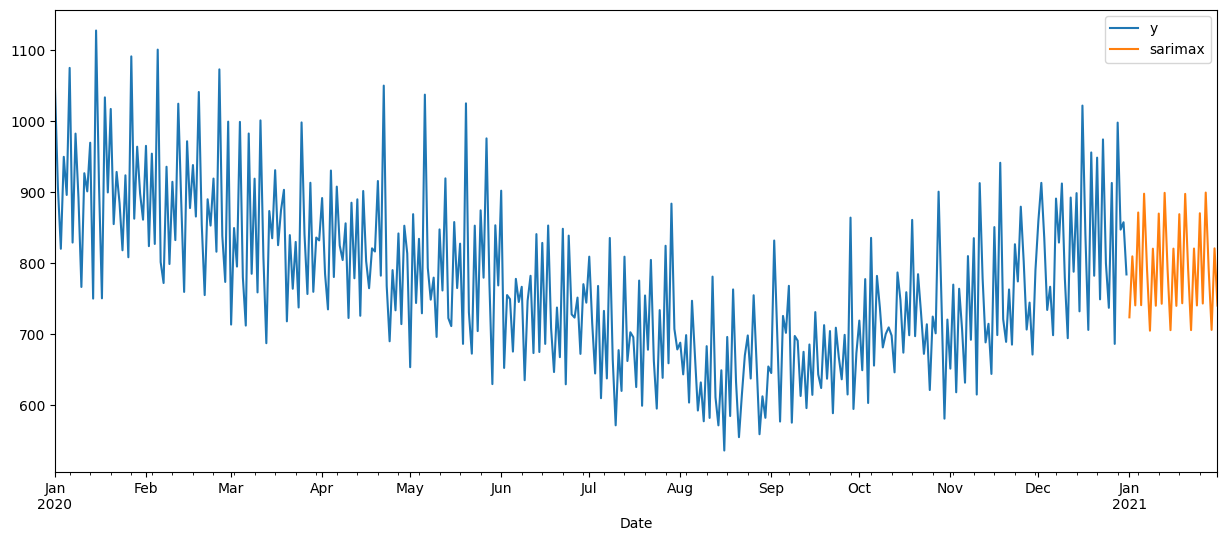

In [12]:
#visulization starting from year 2020
df['y']['2020-01-01':].plot(figsize = (15,6), legend = True)
predictions_sarimax.plot(legend = True)

In [13]:
#exporting
predictions_sarimax.to_csv("predictions_sarimax.csv")

# Summary

### SARIMAX Pros and Cons
Pros: 
- Easy Implementation
- Great results


Cons:
- Better with low amount of time periods or frequency
- Poor at dealing with non-linearity
- Does not handle complex seasonalities